In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
data = pd.read_csv("airline_dataset/train.csv")

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 3000 non-null   int64  
 1   Gender                             3000 non-null   object 
 2   Customer Type                      3000 non-null   object 
 3   Age                                3000 non-null   int64  
 4   Type of Travel                     3000 non-null   object 
 5   Class                              3000 non-null   object 
 6   Flight Distance                    3000 non-null   int64  
 7   Seat comfort                       3000 non-null   int64  
 8   Departure/Arrival time convenient  3000 non-null   int64  
 9   Food and drink                     3000 non-null   int64  
 10  Gate location                      3000 non-null   int64  
 11  Inflight wifi service              3000 non-null   int64

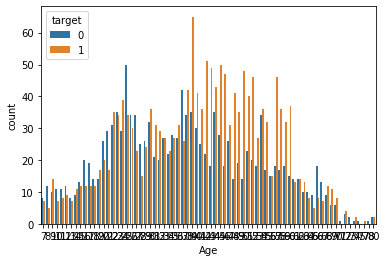

In [52]:
%matplotlib inline
sns.countplot(x="Age", data=data,hue ="target")

In [117]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

def preprocessing(data):
    data.drop(columns = ["id","Age"],inplace= True)
preprocessing(data)
X_data = data.drop("target",axis=1)
y_data =data['target']

number_col = X_data.columns[X_data.dtypes != object].values
cat_col = X_data.columns[X_data.dtypes == object].values

preprocess = ColumnTransformer([("num",MinMaxScaler(),number_col),("cat",OneHotEncoder(),cat_col)])
new_data = preprocess.fit(X_data)

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params = {"C": [1.,2.,5.,10.]}
lr_clf = LogisticRegression()
gsc_clf = GridSearchCV(lr_clf,param_grid = params, cv =5 ,scoring ="accuracy")
gsc_clf.fit(new_data,y_data)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1.0, 2.0, 5.0, 10.0]}, scoring='accuracy')

In [90]:
gsc_clf.best_score_

0.8399999999999999

In [101]:
from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_data, y_data, test_size=0.2, random_state=156)

lgbm_wrapper = LGBMClassifier(n_estimators=400)

lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='accuracy',eval_set = [(X_test,y_test)])

/opt/anaconda3/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's binary_logloss: 0.624971
[2]	valid_0's binary_logloss: 0.573361
[3]	valid_0's binary_logloss: 0.530904
[4]	valid_0's binary_logloss: 0.49294
[5]	valid_0's binary_logloss: 0.463234
[6]	valid_0's binary_logloss: 0.43652
[7]	valid_0's binary_logloss: 0.412745
[8]	valid_0's binary_logloss: 0.391599
[9]	valid_0's binary_logloss: 0.373878
[10]	valid_0's binary_logloss: 0.357684
[11]	valid_0's binary_logloss: 0.341087
[12]	valid_0's binary_logloss: 0.32767
[13]	valid_0's binary_logloss: 0.31461
[14]	valid_0's binary_logloss: 0.303453
[15]	valid_0's binary_logloss: 0.293841
[16]	valid_0's binary_logloss: 0.2854
[17]	valid_0's binary_logloss: 0.277747
[18]	valid_0's binary_logloss: 0.271421
[19]	valid_0's binary_logloss: 0.264905
[20]	valid_0's binary_logloss: 0.260109
[21]	valid_0's binary_logloss: 0.255077
[22]	valid_0's binary_logloss: 0.24977
[23]	valid_0's binary_logloss: 0.246713
[24]	valid_0's binary_logloss: 0.2425
[25]	valid_0's binary_logloss: 0.237731
[26]	valid_0's bin

LGBMClassifier(n_estimators=400)

In [104]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,lgbm_wrapper.predict(X_test))

0.92

In [118]:
# 테스트 데이터셋 전처리 ~ 트레인 데이터셋과 동일하게 처리해야함
data = pd.read_csv("airline_dataset/test.csv")
preprocessing(data)
converted_data = preprocess.transform(data)

In [131]:
## 제출용 
target = lgbm_wrapper.predict(converted_data)
sample = pd.read_csv("airline_dataset/sample_submission.csv")
sample['target'] = target
sample.to_csv("sample_submission.csv",index=False)